In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

import tensorflow as tf

print("Num of GPUs available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num of GPUs available:  0


In [9]:
IMAGE_H = 224
IMAGE_W = 224
BATCH_SIZE = 32
CHANNELS = 3

train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range =  0.2
)

train_generator = train_datagen.flow_from_directory(
    'train_test_valid/train',
    target_size=(IMAGE_H,IMAGE_W),
    class_mode='sparse'

)

Found 900 images belonging to 6 classes.


In [10]:
validation_datagen = ImageDataGenerator (
    rescale=1./255,
)

validation_generator = validation_datagen.flow_from_directory(
    'train_test_valid/valid',
    target_size=(IMAGE_H,IMAGE_W),
    class_mode='sparse',
)
    

Found 39 images belonging to 6 classes.


In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'train_test_valid/train',
    shuffle='True',
    image_size = (IMAGE_H,IMAGE_W),
)

Found 900 files belonging to 6 classes.


In [12]:
class_names = dataset.class_names
class_names

['Moon_jellyfish',
 'barrel_jellyfish',
 'blue_jellyfish',
 'compass_jellyfish',
 'lions_mane_jellyfish',
 'mauve_stinger_jellyfish']

In [13]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    'train_test_valid/test',
    target_size=(IMAGE_H,IMAGE_W),
    class_mode='sparse',

)

Found 40 images belonging to 6 classes.


In [14]:
input_shape = (IMAGE_H,IMAGE_W, CHANNELS)
n_classes = 6

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16,(3,3),1, activation='relu',input_shape =input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
                           
    tf.keras.layers.Conv2D(32,(3,3),1, activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3),1, activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')

])

C:\Users\Cyrus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      11,075,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,100,966 (42.35 MB)

 Trainable params: 11,100,966 (42.35 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics=['accuracy']
)

In [17]:
299/32

9.34375

In [18]:
model.fit(
    train_generator,
    validation_data = validation_generator,
    verbose = 1,
    shuffle = True,
    epochs = 50
)

C:\Users\Cyrus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1734 - loss: 2.4807

C:\Users\Cyrus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1744 - loss: 2.4649 - val_accuracy: 0.2564 - val_loss: 1.6804
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2873 - loss: 1.6288 - val_accuracy: 0.4872 - val_loss: 1.3231
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4091 - loss: 1.4670 - val_accuracy: 0.4615 - val_loss: 1.2998
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.4137 - loss: 1.4468 - val_accuracy: 0.4615 - val_loss: 1.3424
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4573 - loss: 1.3173 - val_accuracy: 0.4103 - val_loss: 1.2845
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5131 - loss: 1.2228 - val_accuracy: 0.4872 - val_loss: 1.3458
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5338 - loss: 1.1797 - val_accuracy: 0.4872 - val_loss: 1.4718
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5232 - loss: 1.1801 - val_accuracy: 0.5128 - val_loss: 1.3134
Epo

In [19]:
scores = model.evaluate(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6583 - loss: 2.0360


first image to predict
actual label:  Moon_jellyfish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
predicted label:  Moon_jellyfish


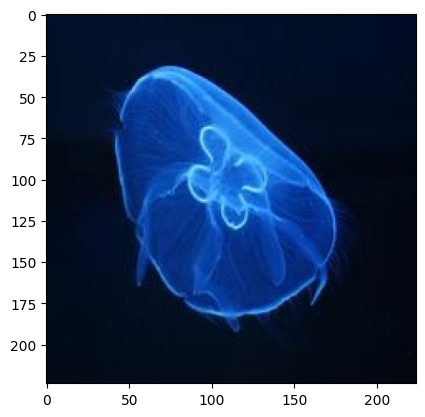

In [20]:
import numpy as np

for images_batch, labels_batch in test_generator:

    first_images = images_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_images)
    print("actual label: ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

    break

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


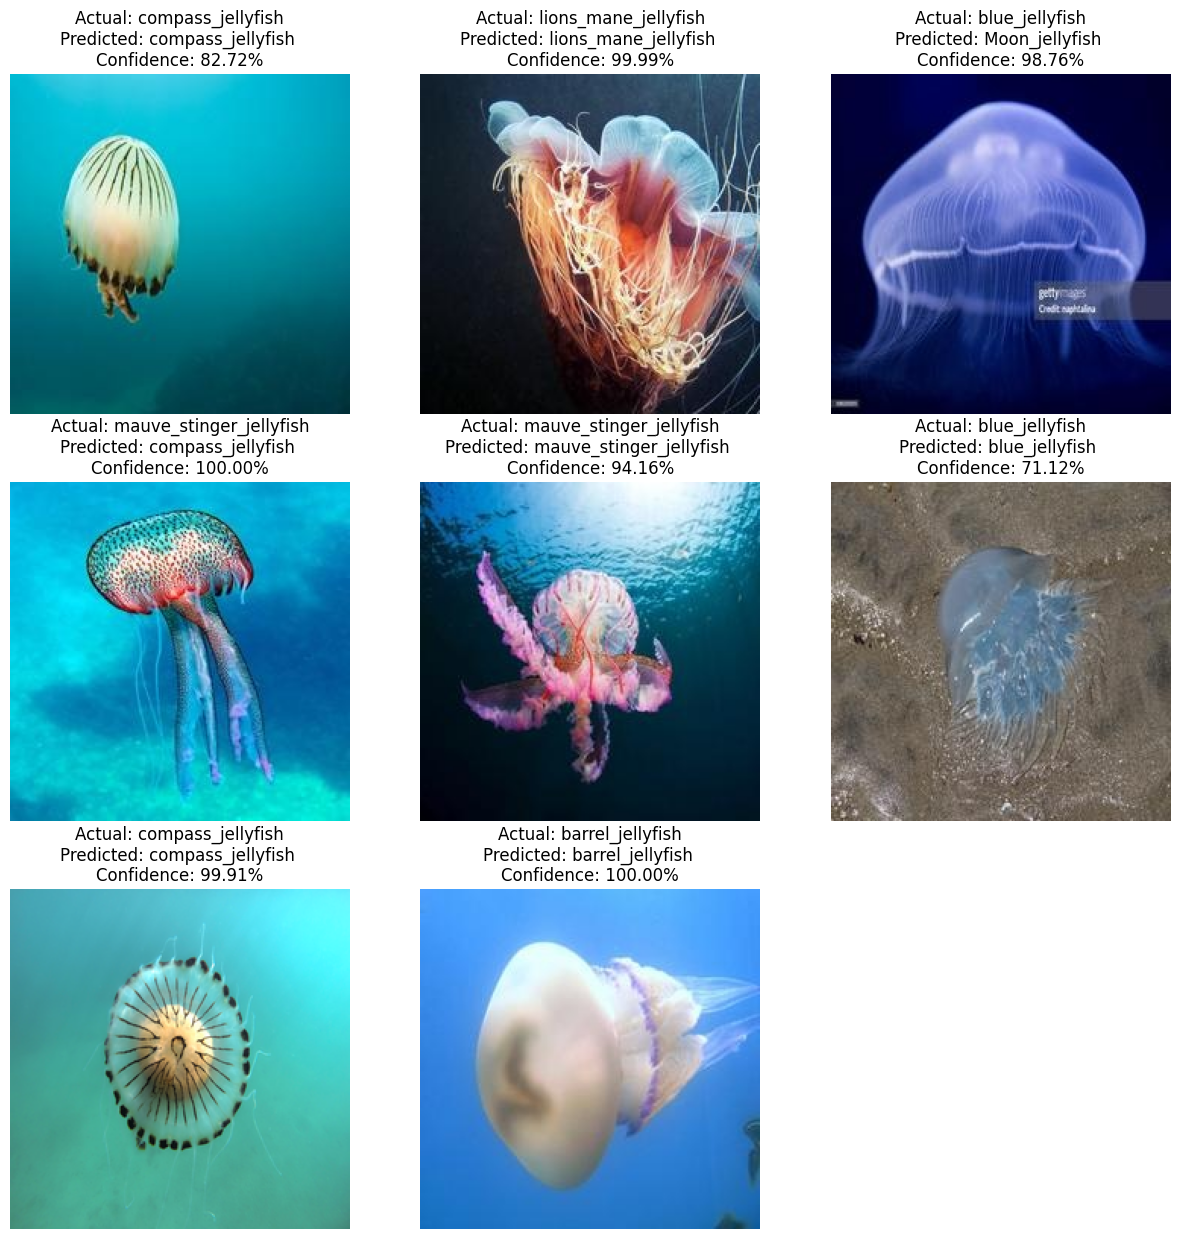

In [26]:
plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(8):
        ax =plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class} \nConfidence: {confidence:.2f}%")
        plt.axis("off")
    break

In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('jellyfish_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Cyrus\AppData\Local\Temp\tmps92cniqh\assets


INFO:tensorflow:Assets written to: C:\Users\Cyrus\AppData\Local\Temp\tmps92cniqh\assets


Saved artifact at 'C:\Users\Cyrus\AppData\Local\Temp\tmps92cniqh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1358317540880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317541840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317540688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317540304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317542416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317541264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317541072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317541648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317540112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1358317539728: TensorSpec(shape=(), dtype=tf.resource, name=None)
